In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('housing_data.csv')

In [9]:
print("Dataset Shape", df.shape)

Dataset Shape (423, 13)


In [11]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
     price   area  bedrooms  bathrooms  stories  parking mainroad guestroom  \
0  5500000   7420         4          2        3        2      yes        no   
1  4500000   8960         4          4        4        3      yes       yes   
2  6000000   9960         3          2        2        2      yes        no   
3  3500000   7200         3          1        1        1      yes        no   
4  7500000  11400         5          3        3        2      yes       yes   

  basement hotwaterheating airconditioning prefarea furnishingstatus  
0       no              no             yes      yes   semi-furnished  
1       no              no             yes       no   semi-furnished  
2      yes              no             yes      yes        furnished  
3       no              no              no       no      unfurnished  
4      yes              no             yes      yes        furnished  


In [13]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             423 non-null    int64 
 1   area              423 non-null    int64 
 2   bedrooms          423 non-null    int64 
 3   bathrooms         423 non-null    int64 
 4   stories           423 non-null    int64 
 5   parking           423 non-null    int64 
 6   mainroad          423 non-null    object
 7   guestroom         423 non-null    object
 8   basement          423 non-null    object
 9   hotwaterheating   423 non-null    object
 10  airconditioning   423 non-null    object
 11  prefarea          423 non-null    object
 12  furnishingstatus  423 non-null    object
dtypes: int64(6), object(7)
memory usage: 43.1+ KB
None


In [17]:
print("\nStatical Summary:")
print(df.describe())


Statical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  4.230000e+02    423.000000  423.000000  423.000000  423.000000   
mean   5.799054e+06   9090.023641    3.316785    2.229314    1.997636   
std    1.448941e+06   1851.649130    0.708029    0.786070    0.636559   
min    2.800000e+06   5000.000000    2.000000    1.000000    1.000000   
25%    4.650000e+06   7600.000000    3.000000    2.000000    2.000000   
50%    5.800000e+06   9000.000000    3.000000    2.000000    2.000000   
75%    6.900000e+06  10600.000000    4.000000    3.000000    2.000000   
max    9.200000e+06  13500.000000    5.000000    4.000000    4.000000   

          parking  
count  423.000000  
mean     1.723404  
std      0.679138  
min      0.000000  
25%      1.000000  
50%      2.000000  
75%      2.000000  
max      3.000000  


In [21]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
parking             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
prefarea            0
furnishingstatus    0
dtype: int64


In [23]:
# Convert categorical variables to numerical

In [25]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']

In [31]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [37]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [39]:
price_outliers = detect_outliers(df, 'price')

In [41]:
print(f"Number of price outliers: {len(price_outliers)}")

Number of price outliers: 0


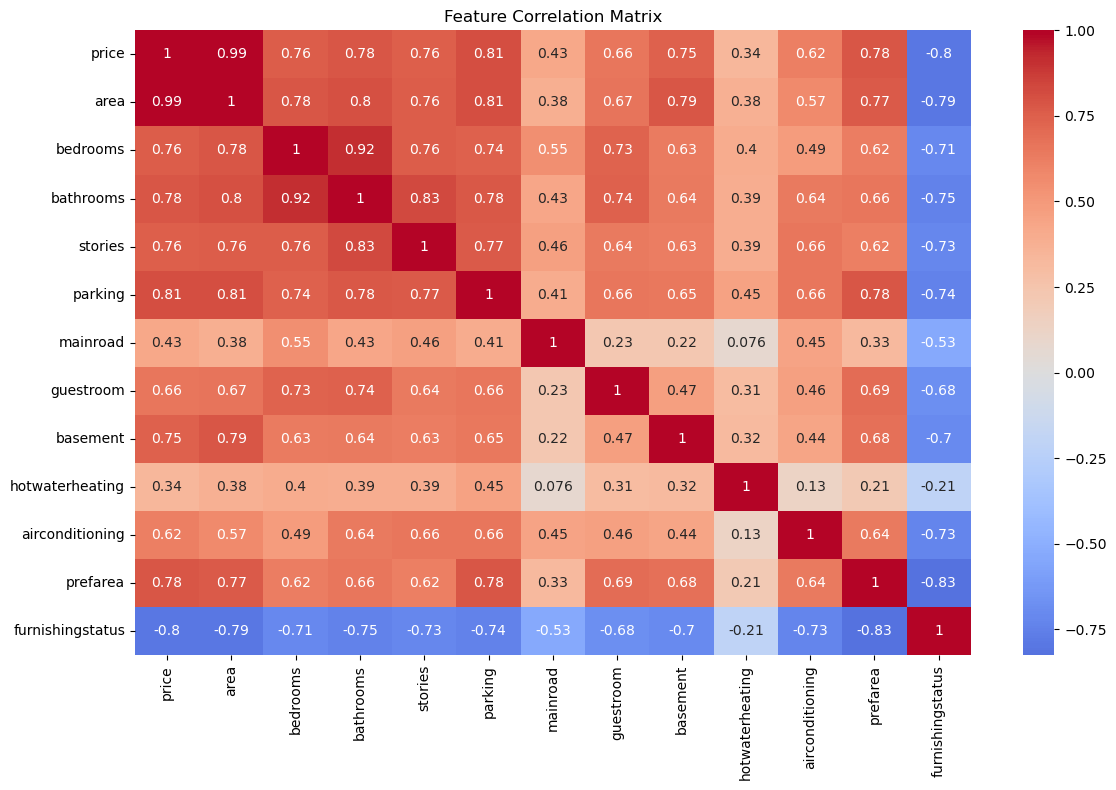

In [43]:
# Feature correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [47]:
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with Price:")
print(price_correlation)

Correlation with Price:
price               1.000000
area                0.986191
parking             0.810549
bathrooms           0.783097
prefarea            0.782717
bedrooms            0.759082
stories             0.757398
basement            0.747711
guestroom           0.655549
airconditioning     0.618872
mainroad            0.428797
hotwaterheating     0.340904
furnishingstatus   -0.801372
Name: price, dtype: float64


In [49]:
selected_features = price_correlation.index[1:7].tolist()

In [51]:
print(f"\nSelected Features: {selected_features}")


Selected Features: ['area', 'parking', 'bathrooms', 'prefarea', 'bedrooms', 'stories']


In [57]:
# Prepare features and target
X = df[selected_features]
y = df['price']

In [69]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [73]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 338 samples
Testing set size: 85 samples
Number of features: 6


In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
print("Model Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Model Coefficients:
area: 1393099.00
parking: 1606.69
bathrooms: -22902.24
prefarea: 74197.08
bedrooms: -65759.36
stories: 62569.70
Intercept: 5782737.05


In [83]:
# Make predictions
y_pred = model.predict(X_test)


In [85]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [87]:
print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics:
Mean Squared Error (MSE): 53298612590.89
Root Mean Squared Error (RMSE): 230864.92
R² Score: 0.9765


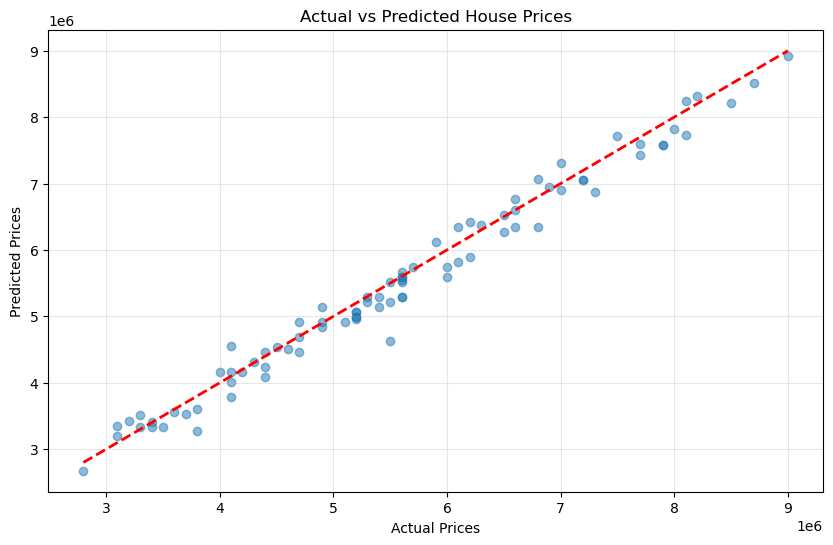

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True, alpha=0.3)
plt.show()

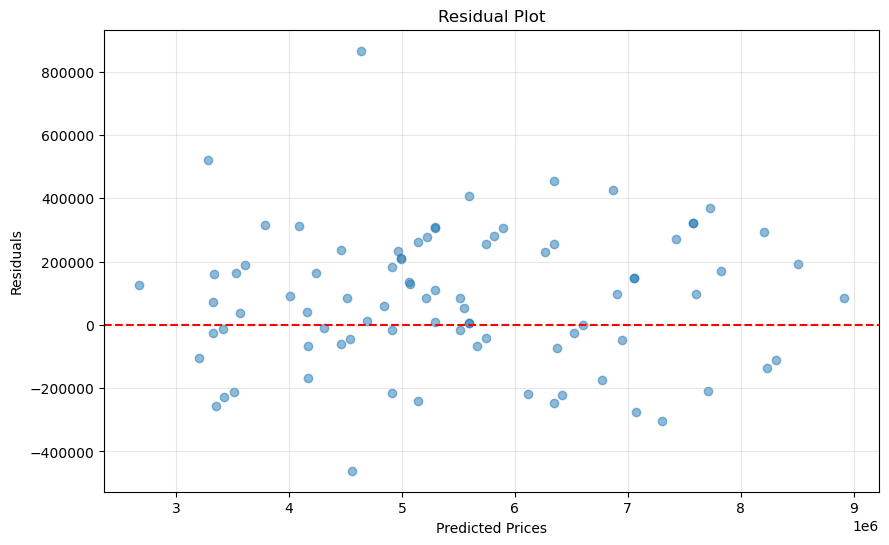

In [91]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

In [93]:
# Feature importance based on coefficients
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_,
    'Absolute_Importance': abs(model.coef_)
}).sort_values('Absolute_Importance', ascending=False)


In [95]:
print("Feature Importance:")
print(feature_importance)

Feature Importance:
     Feature   Coefficient  Absolute_Importance
0       area  1.393099e+06         1.393099e+06
3   prefarea  7.419708e+04         7.419708e+04
4   bedrooms -6.575936e+04         6.575936e+04
5    stories  6.256970e+04         6.256970e+04
2  bathrooms -2.290224e+04         2.290224e+04
1    parking  1.606687e+03         1.606687e+03


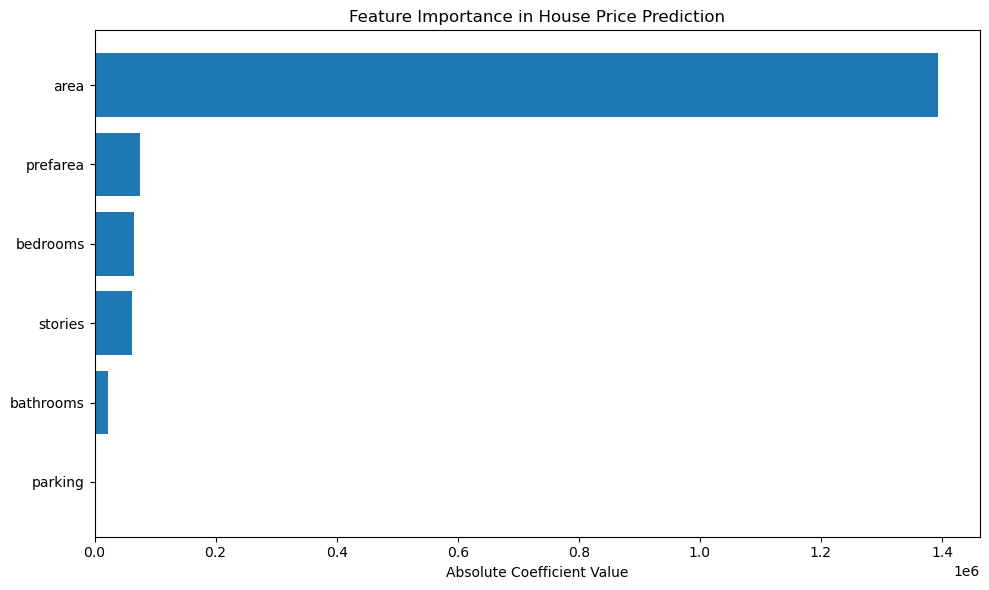

In [97]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute_Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in House Price Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [99]:
import joblib
import json

In [101]:
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')


['feature_scaler.pkl']

In [105]:
# Save feature names
with open('feature_names.json', 'w') as f:
    json.dump(selected_features, f)

In [107]:
print("Model saved as 'house_price_model.pkl'")
print("Scaler saved as 'feature_scaler.pkl'")
print("Feature names saved as 'feature_names.json'")

Model saved as 'house_price_model.pkl'
Scaler saved as 'feature_scaler.pkl'
Feature names saved as 'feature_names.json'


In [109]:
print("\nExample Predictions:")
print("-" * 50)


Example Predictions:
--------------------------------------------------


In [111]:
# Create sample test cases
sample_indices = [0, 10, 20]  # Sample indices from test set
for idx in sample_indices:
    if idx < len(X_test):
        sample_features = X_test[idx].reshape(1, -1)
        actual_price = y_test.iloc[idx]
        predicted_price = model.predict(sample_features)[0]
        
        print(f"Sample {idx + 1}:")
        print(f"  Actual Price: ₹{actual_price:,.2f}")
        print(f"  Predicted Price: ₹{predicted_price:,.2f}")
        print(f"  Difference: ₹{abs(actual_price - predicted_price):,.2f}")
        print(f"  Percentage Error: {abs((actual_price - predicted_price)/actual_price)*100:.2f}%")
        print("-" * 50)

Sample 1:
  Actual Price: ₹6,300,000.00
  Predicted Price: ₹6,374,408.60
  Difference: ₹74,408.60
  Percentage Error: 1.18%
--------------------------------------------------
Sample 11:
  Actual Price: ₹3,100,000.00
  Predicted Price: ₹3,355,714.54
  Difference: ₹255,714.54
  Percentage Error: 8.25%
--------------------------------------------------
Sample 21:
  Actual Price: ₹5,100,000.00
  Predicted Price: ₹4,916,154.99
  Difference: ₹183,845.01
  Percentage Error: 3.60%
--------------------------------------------------


In [113]:
def predict_house_price(features_dict):
    """
    Predict house price for new data
    features_dict: Dictionary containing feature values
    """
    # Load model and scaler
    loaded_model = joblib.load('house_price_model.pkl')
    loaded_scaler = joblib.load('feature_scaler.pkl')
    
    # Create feature array in correct order
    features_array = np.array([[features_dict[feature] for feature in selected_features]])
    
    # Scale features
    features_scaled = loaded_scaler.transform(features_array)
    
    # Make prediction
    prediction = loaded_model.predict(features_scaled)[0]
    
    return prediction

In [119]:
example_features = {
    "area": 3000,
    "bedrooms": 3,
    "bathrooms": 2,
    "stories": 2,
    "parking": 1,
    "prefarea": 1
}

In [121]:
predicted_price = predict_house_price(example_features)
print(f"\nPredicted Price for Example House:")
print(f"Features: {example_features}")
print(f"Predicted Price: ₹{predicted_price:,.2f}")


Predicted Price for Example House:
Features: {'area': 3000, 'bedrooms': 3, 'bathrooms': 2, 'stories': 2, 'parking': 1, 'prefarea': 1}
Predicted Price: ₹1,296,793.93


In [125]:
def complete_house_price_pipeline():
    """
    Complete pipeline from data loading to model deployment
    """
    print("=" * 60)
    print("HOUSE PRICE PREDICTION PIPELINE")
    print("=" * 60)

    print("\n Loading and preparing data...")
    df = pd.read_csv('housing_data.csv')

    le = LabelEncoder()
    categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    print("Selecting features...")
    correlation_matrix = df.corr()
    price_correlation = correlation_matrix['price'].sort_values(ascending=False)
    selected_features = price_correlation.index[1:7].tolist()
    
    X = df[selected_features]
    y = df['price']

    print("Splitting data into train and test sets...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    
    print("Training Linear Regression model...")
    model = LinearRegression()
    model.fit(X_train, y_train)

    print("Evaluating model...")
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nModel Evaluation Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

    print("\nSaving model and artifacts...")
    joblib.dump(model, 'house_price_model.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl')
    joblib.dump(selected_features, 'selected_features.pkl')
    
    print("\nPipeline completed successfully!")
    print("Model saved as 'house_price_model.pkl'")
    print(f"Final RMSE: {rmse:.2f}")
    print(f"Final R²: {r2:.4f}")
    
    return model, scaler, selected_features, rmse, r2

model, scaler, features, rmse, r2 = complete_house_price_pipeline()

HOUSE PRICE PREDICTION PIPELINE

 Loading and preparing data...
Selecting features...
Splitting data into train and test sets...
Training Linear Regression model...
Evaluating model...

Model Evaluation Results:
RMSE: 230864.92
R² Score: 0.9765

Saving model and artifacts...

Pipeline completed successfully!
Model saved as 'house_price_model.pkl'
Final RMSE: 230864.92
Final R²: 0.9765


In [127]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
